
0: 640x480 1 bac poubelle, 190.3ms
Speed: 47.9ms preprocess, 190.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


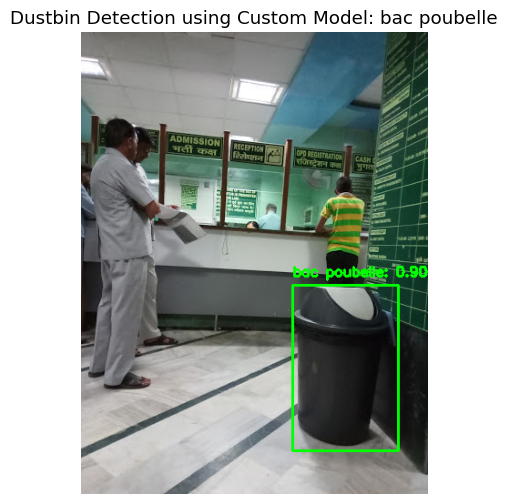

In [62]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your custom-trained YOLOv8 model
model = YOLO(r'E:\dustbin_projrct\poubelles.v3i.yolov8\trashed_model.pt')

# Load your input image
img = cv2.imread(r'C:\Users\HP\Desktop\hh\tt.jpg')

# Perform object detection using your custom model
results = model(img)

# The class name for dustbin is "bac poubelle"
dustbin_class_name = "bac poubelle"

# Parse the detection results and draw bounding boxes
for result in results:
    for box in result.boxes:  # Loop through bounding boxes
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Check if the detected class is "bac poubelle"
        if model.names[class_id] == dustbin_class_name:  # Compare detected class name to "bac poubelle"
            # Draw the bounding box on the image
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            # Label the detection with the class name and confidence
            label = f'{dustbin_class_name}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert the image from BGR (OpenCV format) to RGB (for Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Dustbin Detection using Custom Model: bac poubelle')
plt.show()



0: 640x480 1 bac poubelle, 286.8ms
Speed: 19.6ms preprocess, 286.8ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 480)


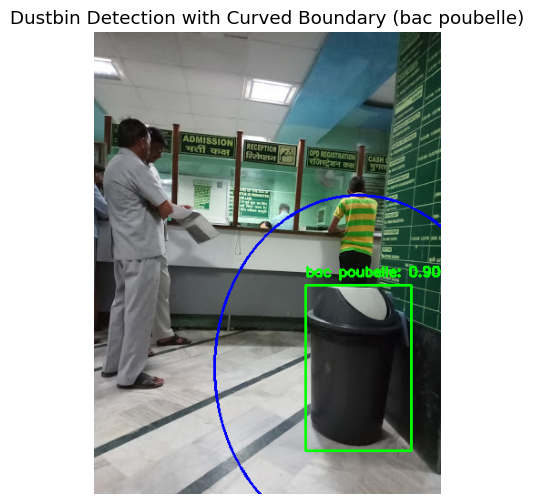

In [68]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your custom-trained YOLOv8 model
model = YOLO(r'E:\dustbin_projrct\poubelles.v3i.yolov8\trashed_model.pt')

# Load the image from the specified path
img = cv2.imread(r'C:\Users\HP\Desktop\hh\tt.jpg')
height, width, _ = img.shape  # Get image dimensions

# Approximate 1 meter in pixels (adjust based on your understanding of scale)
boundary_in_pixels = 100  # You can adjust this for a better approximation of 1 meter

# Perform object detection using your custom model
results = model(img)

# The class name for dustbin is "bac poubelle"
dustbin_class_name = "bac poubelle"

# Parse the detection results and draw bounding boxes with curved boundaries
for result in results:
    for box in result.boxes:  # Loop through bounding boxes
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Check if the detected class is "bac poubelle"
        if model.names[class_id] == dustbin_class_name:
            # Draw the original bounding box (optional)
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            label = f'{dustbin_class_name}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Calculate the center of the bounding box and the size
            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)
            box_width = int(x2 - x1)
            box_height = int(y2 - y1)

            # Expand the width and height to create a 1-meter boundary (approximation)
            boundary_width = box_width + 2 * boundary_in_pixels
            boundary_height = box_height + 2 * boundary_in_pixels

            # Draw an ellipse as the curved boundary
            cv2.ellipse(img, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 0, 0), 2)  # Blue ellipse

# Convert the image from BGR (OpenCV format) to RGB (for Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Dustbin Detection with Curved Boundary (bac poubelle)')
plt.show()



0: 640x480 1 bac poubelle, 184.7ms
Speed: 20.6ms preprocess, 184.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 (no detections), 209.6ms
Speed: 63.7ms preprocess, 209.6ms inference, 12.6ms postprocess per image at shape (1, 3, 640, 480)


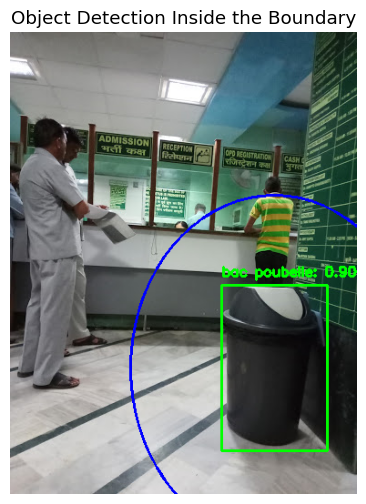

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your custom-trained YOLOv8 model for detecting the dustbin
dustbin_model = YOLO(r'E:\dustbin_projrct\poubelles.v3i.yolov8\trashed_model.pt')

# Load your second pretrained YOLOv8 model for detecting objects inside the boundary
object_model = YOLO('yolov8n.pt')

# Load the image from the specified path
img = cv2.imread(r'C:\Users\HP\Desktop\hh\tt.jpg')
height, width, _ = img.shape  # Get image dimensions

# Approximate 1 meter in pixels (adjust based on your understanding of scale)
boundary_in_pixels = 100  # You can adjust this for a better approximation of 1 meter

# Perform object detection using the dustbin model
results = dustbin_model(img)

# The class name for dustbin is "bac poubelle"
dustbin_class_name = "bac poubelle"

# Variables to store the center of the detected dustbin
center_x, center_y = None, None
boundary_width, boundary_height = 0, 0

# Parse the detection results to draw bounding boxes and boundaries
for result in results:
    for box in result.boxes:  # Loop through bounding boxes
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Check if the detected class is "bac poubelle"
        if dustbin_model.names[class_id] == dustbin_class_name:
            # Draw the original bounding box (optional)
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            label = f'{dustbin_class_name}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Calculate the center of the bounding box and store it
            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)

            # Ensure that boundary width and height are integers
            boundary_width = int((x2 - x1) + 2 * boundary_in_pixels)
            boundary_height = int((y2 - y1) + 2 * boundary_in_pixels)

            # Draw an ellipse as the curved boundary
            cv2.ellipse(img, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 0, 0), 2)  # Blue ellipse

# Check if a dustbin was detected
if center_x is not None and center_y is not None:
    # Define the mask for the area inside the boundary
    mask = np.zeros_like(img)
    cv2.ellipse(mask, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 255, 255), -1)

    # Apply the mask to the image to isolate the region of interest
    roi = cv2.bitwise_and(img, mask)

    # Perform object detection on the ROI using the second model
    roi_results = object_model(roi)

    # Parse the detection results for objects inside the boundary
    for roi_result in roi_results:
        for box in roi_result.boxes:  # Loop through bounding boxes in ROI
            class_id = box.cls.item()  # Get the class ID of the detected object
            confidence = box.conf.item()  # Get the confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

            # Adjust the coordinates to match the original image
            x1 += center_x - (boundary_width // 2)
            y1 += center_y - (boundary_height // 2)
            x2 += center_x - (boundary_width // 2)
            y2 += center_y - (boundary_height // 2)

            # Draw bounding box for detected objects in the ROI
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)  # Red bounding box
            label = f'{object_model.names[class_id]}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Convert the image from BGR (OpenCV format) to RGB (for Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Object Detection Inside the Boundary')
plt.show()


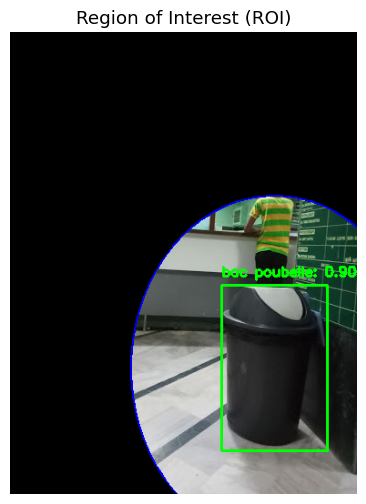


0: 640x480 (no detections), 361.7ms
Speed: 47.4ms preprocess, 361.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
ROI Detection Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple'

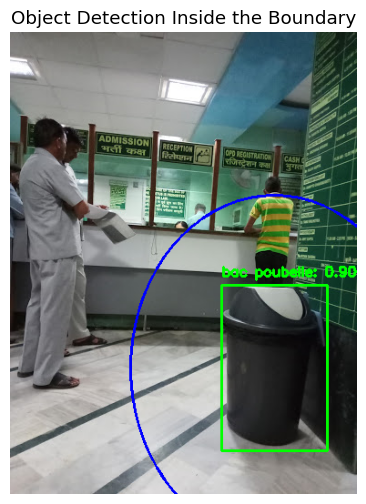

In [71]:
# After defining the mask for the area inside the boundary
if center_x is not None and center_y is not None:
    # Define the mask for the area inside the boundary
    mask = np.zeros_like(img)
    cv2.ellipse(mask, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 255, 255), -1)

    # Apply the mask to the image to isolate the region of interest
    roi = cv2.bitwise_and(img, mask)

    # Visualize the ROI
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.title('Region of Interest (ROI)')
    plt.show()

    # Perform object detection on the ROI using the second model
    roi_results = object_model(roi)

    # Print out the ROI results for debugging
    print("ROI Detection Results:")
    print(roi_results)

    # Parse the detection results for objects inside the boundary
    for roi_result in roi_results:
        for box in roi_result.boxes:  # Loop through bounding boxes in ROI
            class_id = box.cls.item()  # Get the class ID of the detected object
            confidence = box.conf.item()  # Get the confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

            # Adjust the coordinates to match the original image
            x1 += center_x - (boundary_width // 2)
            y1 += center_y - (boundary_height // 2)
            x2 += center_x - (boundary_width // 2)
            y2 += center_y - (boundary_height // 2)

            # Draw bounding box for detected objects in the ROI
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)  # Red bounding box
            label = f'{object_model.names[class_id]}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Convert the image from BGR (OpenCV format) to RGB (for Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Object Detection Inside the Boundary')
plt.show()



0: 640x480 1 bac poubelle, 193.5ms
Speed: 25.8ms preprocess, 193.5ms inference, 12.8ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 (no detections), 225.0ms
Speed: 0.0ms preprocess, 225.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 3 persons, 568.8ms
Speed: 21.6ms preprocess, 568.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


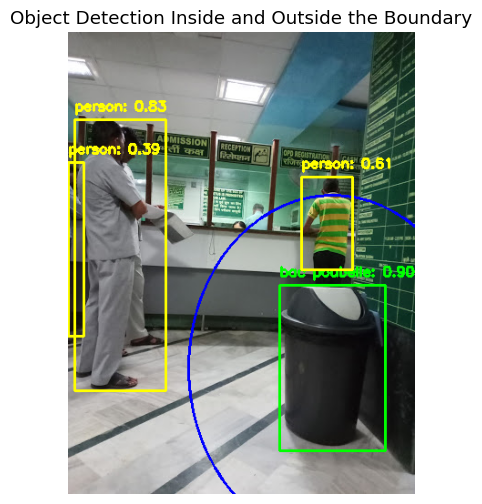

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your custom-trained YOLOv8 model for detecting the dustbin
dustbin_model = YOLO(r'E:\dustbin_projrct\poubelles.v3i.yolov8\trashed_model.pt')

# Load your second pretrained YOLOv8 model for detecting objects inside and outside the boundary
object_model = YOLO('yolov8n.pt')

# Load the image from the specified path
img = cv2.imread(r'C:\Users\HP\Desktop\hh\tt.jpg')
height, width, _ = img.shape  # Get image dimensions

# Approximate 1 meter in pixels (adjust based on your understanding of scale)
boundary_in_pixels = 100  # You can adjust this for a better approximation of 1 meter

# Perform object detection using the dustbin model
results = dustbin_model(img)

# The class name for dustbin is "bac poubelle"
dustbin_class_name = "bac poubelle"

# Variables to store the center of the detected dustbin
center_x, center_y = None, None
boundary_width, boundary_height = 0, 0

# Parse the detection results to draw bounding boxes and boundaries
for result in results:
    for box in result.boxes:  # Loop through bounding boxes
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Check if the detected class is "bac poubelle"
        if dustbin_model.names[class_id] == dustbin_class_name:
            # Draw the original bounding box (optional)
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            label = f'{dustbin_class_name}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Calculate the center of the bounding box and store it
            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)

            # Ensure that boundary width and height are integers
            boundary_width = int((x2 - x1) + 2 * boundary_in_pixels)
            boundary_height = int((y2 - y1) + 2 * boundary_in_pixels)

            # Draw an ellipse as the curved boundary
            cv2.ellipse(img, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 0, 0), 2)  # Blue ellipse

# Check if a dustbin was detected
if center_x is not None and center_y is not None:
    # Define the mask for the area inside the boundary
    mask = np.zeros_like(img)
    cv2.ellipse(mask, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 255, 255), -1)

    # Apply the mask to the image to isolate the region of interest
    roi = cv2.bitwise_and(img, mask)

    # Perform object detection on the masked ROI using the second model
    roi_results = object_model(roi)

    # Parse the detection results for objects inside the boundary
    for roi_result in roi_results:
        for box in roi_result.boxes:  # Loop through bounding boxes in ROI
            class_id = box.cls.item()  # Get the class ID of the detected object
            confidence = box.conf.item()  # Get the confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

            # Adjust the coordinates to match the original image
            x1 += center_x - (boundary_width // 2)
            y1 += center_y - (boundary_height // 2)
            x2 += center_x - (boundary_width // 2)
            y2 += center_y - (boundary_height // 2)

            # Draw bounding box for detected objects in the ROI
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)  # Red bounding box
            label = f'{object_model.names[class_id]}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Perform object detection on the original image for outside detection
full_results = object_model(img)

# Parse the detection results for objects outside the boundary
for full_result in full_results:
    for box in full_result.boxes:  # Loop through bounding boxes in the full image
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Draw bounding box for detected objects in the original image
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)  # Yellow bounding box
        label = f'{object_model.names[class_id]}: {confidence:.2f}'
        cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

# Convert the image from BGR (OpenCV format) to RGB (for Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Object Detection Inside and Outside the Boundary')
plt.show()



0: 640x480 1 bac poubelle, 202.7ms
Speed: 81.4ms preprocess, 202.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 (no detections), 191.7ms
Speed: 76.6ms preprocess, 191.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 3 persons, 351.6ms
Speed: 92.9ms preprocess, 351.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Object at (57.0, 245.0) is 2.64 meters away from the dustbin.
Object at (284.0, 210.0) is 1.59 meters away from the dustbin.
Object at (8.0, 239.0) is 3.11 meters away from the dustbin.
The nearest object to the dustbin at (284.0, 210.0) is 1.59 meters away.


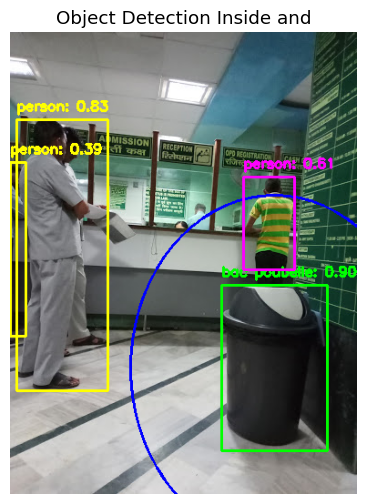

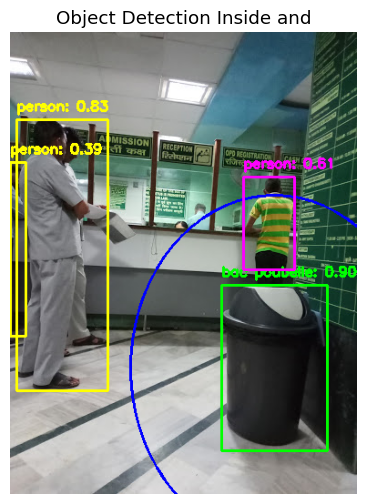

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your custom-trained YOLOv8 model for detecting the dustbin
dustbin_model = YOLO(r'E:\dustbin_projrct\poubelles.v3i.yolov8\trashed_model.pt')

# Load your second pretrained YOLOv8 model for detecting objects inside and outside the boundary
object_model = YOLO('yolov8n.pt')

# Load the image from the specified path
img = cv2.imread(r'C:\Users\HP\Desktop\hh\tt.jpg')
height, width, _ = img.shape  # Get image dimensions

# Approximate 1 meter in pixels (adjust based on your understanding of scale)
boundary_in_pixels = 100  # You can adjust this for a better approximation of 1 meter
scale_factor = 0.01  # 1 pixel = 0.01 meters, adjust according to your measurements

# Perform object detection using the dustbin model
results = dustbin_model(img)

# The class name for dustbin is "bac poubelle"
dustbin_class_name = "bac poubelle"

# Variables to store the center of the detected dustbin
center_x, center_y = None, None
boundary_width, boundary_height = 0, 0

# Store object centers for distance calculation
object_centers = []

# Parse the detection results to draw bounding boxes and boundaries
for result in results:
    for box in result.boxes:  # Loop through bounding boxes
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Check if the detected class is "bac poubelle"
        if dustbin_model.names[class_id] == dustbin_class_name:
            # Draw the original bounding box
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            label = f'{dustbin_class_name}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Calculate the center of the bounding box and store it
            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)

            # Ensure that boundary width and height are integers
            boundary_width = int((x2 - x1) + 2 * boundary_in_pixels)
            boundary_height = int((y2 - y1) + 2 * boundary_in_pixels)

            # Draw an ellipse as the curved boundary
            cv2.ellipse(img, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 0, 0), 2)  # Blue ellipse

# Check if a dustbin was detected
if center_x is not None and center_y is not None:
    # Define the mask for the area inside the boundary
    mask = np.zeros_like(img)
    cv2.ellipse(mask, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 255, 255), -1)

    # Apply the mask to the image to isolate the region of interest
    roi = cv2.bitwise_and(img, mask)

    # Perform object detection on the masked ROI using the second model
    roi_results = object_model(roi)

    # Parse the detection results for objects inside the boundary
    for roi_result in roi_results:
        for box in roi_result.boxes:  # Loop through bounding boxes in ROI
            class_id = box.cls.item()  # Get the class ID of the detected object
            confidence = box.conf.item()  # Get the confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

            # Adjust the coordinates to match the original image
            x1 += center_x - (boundary_width // 2)
            y1 += center_y - (boundary_height // 2)
            x2 += center_x - (boundary_width // 2)
            y2 += center_y - (boundary_height // 2)

            # Calculate the center of the detected object
            object_center = ((x1 + x2) // 2, (y1 + y2) // 2)
            object_centers.append(object_center)

            # Draw bounding box for detected objects in the ROI
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)  # Red bounding box
            label = f'{object_model.names[class_id]}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Perform object detection on the original image for outside detection
full_results = object_model(img)

# Parse the detection results for objects outside the boundary
for full_result in full_results:
    for box in full_result.boxes:  # Loop through bounding boxes in the full image
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Calculate the center of the detected object
        object_center = ((x1 + x2) // 2, (y1 + y2) // 2)
        object_centers.append(object_center)

        # Draw bounding box for detected objects in the original image
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)  # Yellow bounding box
        label = f'{object_model.names[class_id]}: {confidence:.2f}'
        cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

# Calculate the distances from the dustbin center to all object centers
if center_x is not None and center_y is not None:
    nearest_distance = float('inf')
    nearest_object = None

    # Print distances to all detected objects
    for obj_center in object_centers:
        obj_x, obj_y = obj_center
        # Calculate Euclidean distance
        distance_pixels = np.sqrt((obj_x - center_x) ** 2 + (obj_y - center_y) ** 2)

        # Convert pixel distance to meters
        distance_meters = distance_pixels * scale_factor

        # Print the distance and coordinates of the object
        print(f'Object at {obj_center} is {distance_meters:.2f} meters away from the dustbin.')

        # Check for nearest object
        if distance_meters < nearest_distance:
            nearest_distance = distance_meters
            nearest_object = obj_center

    # Print the nearest object coordinates and distance
    if nearest_object is not None:
        print(f'The nearest object to the dustbin at {nearest_object} is {nearest_distance:.2f} meters away.')

        # Change bounding box color for the nearest object
        obj_x, obj_y = nearest_object
        for box in full_results:
            for b in box.boxes:
                if (b.xyxy[0][0] < obj_x < b.xyxy[0][2]) and (b.xyxy[0][1] < obj_y < b.xyxy[0][3]):
                    # Change color to magenta (255, 0, 255)
                    cv2.rectangle(img, (int(b.xyxy[0][0]), int(b.xyxy[0][1])),
                                  (int(b.xyxy[0][2]), int(b.xyxy[0][3])), (255, 0, 255), 2)  # Magenta bounding box
                    label = f'{object_model.names[int(b.cls.item())]}: {b.conf.item():.2f}'
                    cv2.putText(img, label, (int(b.xyxy[0][0]), int(b.xyxy[0][1]) - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)  # Magenta text

# Convert the image from BGR (OpenCV format) to RGB (for Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Object Detection Inside and')
plt.show()


0: 640x480 1 bac poubelle, 185.7ms
Speed: 36.9ms preprocess, 185.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 (no detections), 367.2ms
Speed: 13.3ms preprocess, 367.2ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 3 persons, 513.7ms
Speed: 7.1ms preprocess, 513.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Object at (57.0, 245.0) is 2.64 meters away from the dustbin.
Object at (284.0, 210.0) is 1.59 meters away from the dustbin.
Object at (8.0, 239.0) is 3.11 meters away from the dustbin.
The nearest object to the dustbin at (284.0, 210.0) is 1.59 meters away.


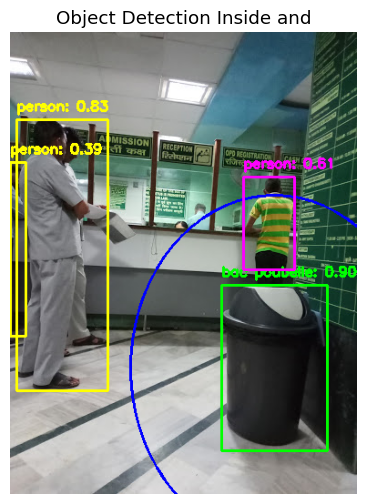

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your custom-trained YOLOv8 model for detecting the dustbin
dustbin_model = YOLO(r'E:\dustbin_projrct\poubelles.v3i.yolov8\trashed_model.pt')

# Load your second pretrained YOLOv8 model for detecting objects inside and outside the boundary
object_model = YOLO('yolov8n.pt')

# Load the image from the specified path
img = cv2.imread(r'C:\Users\HP\Desktop\hh\tt.jpg')
height, width, _ = img.shape  # Get image dimensions

# Approximate 1 meter in pixels (adjust based on your understanding of scale)
boundary_in_pixels = 100  # You can adjust this for a better approximation of 1 meter
scale_factor = 0.01  # 1 pixel = 0.01 meters, adjust according to your measurements

# Perform object detection using the dustbin model
results = dustbin_model(img)

# The class name for dustbin is "bac poubelle"
dustbin_class_name = "bac poubelle"

# Variables to store the center of the detected dustbin
center_x, center_y = None, None
boundary_width, boundary_height = 0, 0

# Store object centers for distance calculation
object_centers = []

# Parse the detection results to draw bounding boxes and boundaries
for result in results:
    for box in result.boxes:  # Loop through bounding boxes
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Check if the detected class is "bac poubelle"
        if dustbin_model.names[class_id] == dustbin_class_name:
            # Draw the original bounding box
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            label = f'{dustbin_class_name}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Calculate the center of the bounding box and store it
            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)

            # Ensure that boundary width and height are integers
            boundary_width = int((x2 - x1) + 2 * boundary_in_pixels)
            boundary_height = int((y2 - y1) + 2 * boundary_in_pixels)

            # Draw an ellipse as the curved boundary
            cv2.ellipse(img, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 0, 0), 2)  # Blue ellipse

# Check if a dustbin was detected
if center_x is not None and center_y is not None:
    # Define the mask for the area inside the boundary
    mask = np.zeros_like(img)
    cv2.ellipse(mask, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 255, 255), -1)

    # Apply the mask to the image to isolate the region of interest
    roi = cv2.bitwise_and(img, mask)

    # Perform object detection on the masked ROI using the second model
    roi_results = object_model(roi)

    # Parse the detection results for objects inside the boundary
    for roi_result in roi_results:
        for box in roi_result.boxes:  # Loop through bounding boxes in ROI
            class_id = box.cls.item()  # Get the class ID of the detected object
            confidence = box.conf.item()  # Get the confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

            # Adjust the coordinates to match the original image
            x1 += center_x - (boundary_width // 2)
            y1 += center_y - (boundary_height // 2)
            x2 += center_x - (boundary_width // 2)
            y2 += center_y - (boundary_height // 2)

            # Calculate the center of the detected object
            object_center = ((x1 + x2) // 2, (y1 + y2) // 2)
            object_centers.append(object_center)

            # Draw bounding box for detected objects in the ROI (inside boundary) with a unique color
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Blue bounding box
            label = f'{object_model.names[class_id]}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # Blue text

# Perform object detection on the original image for outside detection
full_results = object_model(img)

# Parse the detection results for objects outside the boundary
for full_result in full_results:
    for box in full_result.boxes:  # Loop through bounding boxes in the full image
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Calculate the center of the detected object
        object_center = ((x1 + x2) // 2, (y1 + y2) // 2)
        object_centers.append(object_center)

        # Draw bounding box for detected objects in the original image (outside boundary)
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)  # Yellow bounding box
        label = f'{object_model.names[class_id]}: {confidence:.2f}'
        cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)  # Yellow text

# Calculate the distances from the dustbin center to all object centers
if center_x is not None and center_y is not None:
    nearest_distance = float('inf')
    nearest_object = None

    # Print distances to all detected objects
    for obj_center in object_centers:
        obj_x, obj_y = obj_center
        # Calculate Euclidean distance
        distance_pixels = np.sqrt((obj_x - center_x) ** 2 + (obj_y - center_y) ** 2)

        # Convert pixel distance to meters
        distance_meters = distance_pixels * scale_factor

        # Print the distance and coordinates of the object
        print(f'Object at {obj_center} is {distance_meters:.2f} meters away from the dustbin.')

        # Check for nearest object
        if distance_meters < nearest_distance:
            nearest_distance = distance_meters
            nearest_object = obj_center

    # Print the nearest object coordinates and distance
    if nearest_object is not None:
        print(f'The nearest object to the dustbin at {nearest_object} is {nearest_distance:.2f} meters away.')

        # Change bounding box color for the nearest object
        obj_x, obj_y = nearest_object
        for box in full_results:
            for b in box.boxes:
                if (b.xyxy[0][0] < obj_x < b.xyxy[0][2]) and (b.xyxy[0][1] < obj_y < b.xyxy[0][3]):
                    # Change color to magenta (255, 0, 255)
                    cv2.rectangle(img, (int(b.xyxy[0][0]), int(b.xyxy[0][1])),
                                  (int(b.xyxy[0][2]), int(b.xyxy[0][3])), (255, 0, 255), 2)  # Magenta bounding box
                    label = f'{object_model.names[int(b.cls.item())]}: {b.conf.item():.2f}'
                    cv2.putText(img, label, (int(b.xyxy[0][0]), int(b.xyxy[0][1]) - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)  # Magenta text

# Convert the image from BGR (OpenCV format) to RGB (for Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title('Object Detection Inside and')
plt.show()


0: 448x640 1 bac poubelle, 199.6ms
Speed: 6.9ms preprocess, 199.6ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 chair, 245.1ms
Speed: 8.3ms preprocess, 245.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 3 persons, 1 chair, 1 bed, 1 dining table, 194.6ms
Speed: 10.3ms preprocess, 194.6ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Object at (100.0, 553.0) is 1.85 meters away from the dustbin.
Object at (952.0, 446.0) is 8.70 meters away from the dustbin.
Object at (643.0, 343.0) is 5.59 meters away from the dustbin.
Object at (751.0, 400.0) is 6.67 meters away from the dustbin.
Object at (419.0, 329.0) is 3.36 meters away from the dustbin.
Object at (676.0, 492.0) is 6.04 meters away from the dustbin.
Object at (336.0, 377.0) is 2.51 meters away from the dustbin.
The nearest object to the dustbin at (100.0, 553.0) is 1.85 meters away.
Total objects inside the boundary: 1


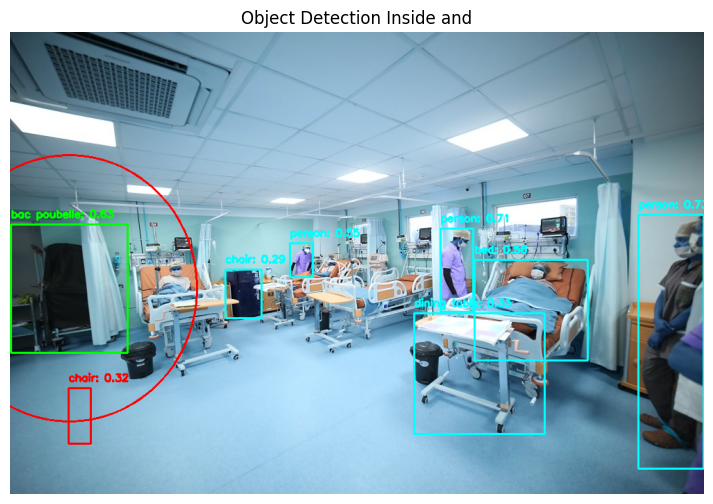

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load your custom-trained YOLOv8 model for detecting the dustbin
dustbin_model = YOLO(r'E:\dustbin_projrct\poubelles.v3i.yolov8\trashed_model.pt')

# Load your second pretrained YOLOv8 model for detecting objects inside and outside the boundary
object_model = YOLO('yolov8n.pt')

# Load the image from the specified path
img = cv2.imread(r'C:\Users\HP\Desktop\hh\b.jpg')
height, width, _ = img.shape  # Get image dimensions

# Approximate 1 meter in pixels (adjust based on your understanding of scale)
boundary_in_pixels = 100  # You can adjust this for a better approximation of 1 meter
scale_factor = 0.01  # 1 pixel = 0.01 meters, adjust according to your measurements

# Perform object detection using the dustbin model
results = dustbin_model(img)

# The class name for dustbin is "bac poubelle"
dustbin_class_name = "bac poubelle"

# Variables to store the center of the detected dustbin
center_x, center_y = None, None
boundary_width, boundary_height = 0, 0

# Store object centers for distance calculation
object_centers = []
inside_boundary_count = 0  # Count of objects inside the boundary

# Parse the detection results to draw bounding boxes and boundaries
for result in results:
    for box in result.boxes:  # Loop through bounding boxes
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Check if the detected class is "bac poubelle"
        if dustbin_model.names[class_id] == dustbin_class_name:
            # Draw the original bounding box
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            label = f'{dustbin_class_name}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Calculate the center of the bounding box and store it
            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)

            # Ensure that boundary width and height are integers
            boundary_width = int((x2 - x1) + 2 * boundary_in_pixels)
            boundary_height = int((y2 - y1) + 2 * boundary_in_pixels)

            # Draw an ellipse as the curved boundary
            cv2.ellipse(img, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 0, 0), 2)  # Blue ellipse

# Check if a dustbin was detected
if center_x is not None and center_y is not None:
    # Define the mask for the area inside the boundary
    mask = np.zeros_like(img)
    cv2.ellipse(mask, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 255, 255), -1)

    # Apply the mask to the image to isolate the region of interest
    roi = cv2.bitwise_and(img, mask)

    # Perform object detection on the masked ROI using the second model
    roi_results = object_model(roi)

    # Parse the detection results for objects inside the boundary
    for roi_result in roi_results:
        for box in roi_result.boxes:  # Loop through bounding boxes in ROI
            class_id = box.cls.item()  # Get the class ID of the detected object
            confidence = box.conf.item()  # Get the confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

            # Adjust the coordinates to match the original image
            x1 += center_x - (boundary_width // 2)
            y1 += center_y - (boundary_height // 2)
            x2 += center_x - (boundary_width // 2)
            y2 += center_y - (boundary_height // 2)

            # Calculate the center of the detected object
            object_center = ((x1 + x2) // 2, (y1 + y2) // 2)
            object_centers.append(object_center)

            # Draw bounding box for detected objects in the ROI (inside boundary) with a unique color
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Blue bounding box
            label = f'{object_model.names[class_id]}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # Blue text

            # Increment the count of objects inside the boundary
            inside_boundary_count += 1

# Perform object detection on the original image for outside detection
full_results = object_model(img)

# Parse the detection results for objects outside the boundary
for full_result in full_results:
    for box in full_result.boxes:  # Loop through bounding boxes in the full image
        class_id = box.cls.item()  # Get the class ID of the detected object
        confidence = box.conf.item()  # Get the confidence score
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

        # Calculate the center of the detected object
        object_center = ((x1 + x2) // 2, (y1 + y2) // 2)
        object_centers.append(object_center)

        # Draw bounding box for detected objects in the original image (outside boundary)
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)  # Yellow bounding box
        label = f'{object_model.names[class_id]}: {confidence:.2f}'
        cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)  # Yellow text

# Calculate the distances from the dustbin center to all object centers
if center_x is not None and center_y is not None:
    nearest_distance = float('inf')
    nearest_object = None

    # Print distances to all detected objects
    for obj_center in object_centers:
        obj_x, obj_y = obj_center
        # Calculate Euclidean distance
        distance_pixels = np.sqrt((obj_x - center_x) ** 2 + (obj_y - center_y) ** 2)

        # Convert pixel distance to meters
        distance_meters = distance_pixels * scale_factor

        # Print the distance and coordinates of the object
        print(f'Object at {obj_center} is {distance_meters:.2f} meters away from the dustbin.')

        # Check for nearest object
        if distance_meters < nearest_distance:
            nearest_distance = distance_meters
            nearest_object = obj_center

    # Print the nearest object coordinates and distance
    if nearest_object is not None:
        print(f'The nearest object to the dustbin at {nearest_object} is {nearest_distance:.2f} meters away.')

        # Change bounding box color for the nearest object
        obj_x, obj_y = nearest_object
        for box in full_results:
            for b in box.boxes:
                if (b.xyxy[0][0] < obj_x < b.xyxy[0][2]) and (b.xyxy[0][1] < obj_y < b.xyxy[0][3]):
                    # Change color to magenta (255, 0, 255)
                    cv2.rectangle(img, (int(b.xyxy[0][0]), int(b.xyxy[0][1])),
                                  (int(b.xyxy[0][2]), int(b.xyxy[0][3])), (255, 0, 255), 2)  # Magenta bounding box
                    label = f'{object_model.names[int(b.cls.item())]}: {b.conf.item():.2f}'
                    cv2.putText(img, label, (int(b.xyxy[0][0]), int(b.xyxy[0][1]) - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)  # Magenta text

# Print the count of objects inside the boundary
if inside_boundary_count > 0:
    print(f'Total objects inside the boundary: {inside_boundary_count}')


# Display the image using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title('Object Detection Inside and')
plt.show()


In [13]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load your custom-trained YOLOv8 model for detecting the dustbin
dustbin_model = YOLO(r'E:\dustbin_projrct\poubelles.v3i.yolov8\trashed_model.pt')

# Load your second pretrained YOLOv8 model for detecting objects inside and outside the boundary
object_model = YOLO('yolov8n.pt')

# Open the video file
video_path = r'C:\Users\HP\Downloads\o.mp4'  # Update this with your video file path
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define a VideoWriter object to save the processed video
output_path = r'C:\Users\HP\Desktop\hh\processed_video.mp4'  # Update this with your output path
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Approximate 1 meter in pixels (adjust based on your understanding of scale)
boundary_in_pixels = 100  # You can adjust this for a better approximation of 1 meter
scale_factor = 0.01  # 1 pixel = 0.01 meters, adjust according to your measurements

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        break  # Exit the loop if the video ends

    # Perform object detection using the dustbin model
    results = dustbin_model(img)

    # The class name for dustbin is "bac poubelle"
    dustbin_class_name = "bac poubelle"

    # Variables to store the center of the detected dustbin
    center_x, center_y = None, None
    boundary_width, boundary_height = 0, 0

    # Store object centers for distance calculation
    object_centers = []
    inside_boundary_count = 0  # Count of objects inside the boundary

    # Parse the detection results to draw bounding boxes and boundaries
    for result in results:
        for box in result.boxes:  # Loop through bounding boxes
            class_id = box.cls.item()  # Get the class ID of the detected object
            confidence = box.conf.item()  # Get the confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

            # Check if the detected class is "bac poubelle"
            if dustbin_model.names[class_id] == dustbin_class_name:
                # Draw the original bounding box
                cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                label = f'{dustbin_class_name}: {confidence:.2f}'
                cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                # Calculate the center of the bounding box and store it
                center_x = int((x1 + x2) / 2)
                center_y = int((y1 + y2) / 2)

                # Ensure that boundary width and height are integers
                boundary_width = int((x2 - x1) + 2 * boundary_in_pixels)
                boundary_height = int((y2 - y1) + 2 * boundary_in_pixels)

                # Draw an ellipse as the curved boundary
                cv2.ellipse(img, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 0, 0), 2)  # Blue ellipse

    # Check if a dustbin was detected
    if center_x is not None and center_y is not None:
        # Define the mask for the area inside the boundary
        mask = np.zeros_like(img)
        cv2.ellipse(mask, (center_x, center_y), (boundary_width // 2, boundary_height // 2), 0, 0, 360, (255, 255, 255), -1)

        # Apply the mask to the image to isolate the region of interest
        roi = cv2.bitwise_and(img, mask)

        # Perform object detection on the masked ROI using the second model
        roi_results = object_model(roi)

        # Parse the detection results for objects inside the boundary
        for roi_result in roi_results:
            for box in roi_result.boxes:  # Loop through bounding boxes in ROI
                class_id = box.cls.item()  # Get the class ID of the detected object
                confidence = box.conf.item()  # Get the confidence score
                x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

                # Adjust the coordinates to match the original image
                x1 += center_x - (boundary_width // 2)
                y1 += center_y - (boundary_height // 2)
                x2 += center_x - (boundary_width // 2)
                y2 += center_y - (boundary_height // 2)

                # Calculate the center of the detected object
                object_center = ((x1 + x2) // 2, (y1 + y2) // 2)
                object_centers.append(object_center)

                # Draw bounding box for detected objects in the ROI (inside boundary) with a unique color
                cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Blue bounding box
                label = f'{object_model.names[class_id]}: {confidence:.2f}'
                cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # Blue text

                # Increment the count of objects inside the boundary
                inside_boundary_count += 1

    # Perform object detection on the original image for outside detection
    full_results = object_model(img)

    # Parse the detection results for objects outside the boundary
    for full_result in full_results:
        for box in full_result.boxes:  # Loop through bounding boxes in the full image
            class_id = box.cls.item()  # Get the class ID of the detected object
            confidence = box.conf.item()  # Get the confidence score
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordinates of the bounding box

            # Calculate the center of the detected object
            object_center = ((x1 + x2) // 2, (y1 + y2) // 2)
            object_centers.append(object_center)

            # Draw bounding box for detected objects in the original image (outside boundary)
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), 2)  # Yellow bounding box
            label = f'{object_model.names[class_id]}: {confidence:.2f}'
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)  # Yellow text

    # Calculate the distances from the dustbin center to all object centers
    if center_x is not None and center_y is not None:
        nearest_distance = float('inf')
        nearest_object = None

        # Print distances to all detected objects
        for obj_center in object_centers:
            obj_x, obj_y = obj_center
            # Calculate Euclidean distance
            distance_pixels = np.sqrt((obj_x - center_x) ** 2 + (obj_y - center_y) ** 2)

            # Convert pixel distance to meters
            distance_meters = distance_pixels * scale_factor

            # Print the distance and coordinates of the object
            print(f'Object at {obj_center} is {distance_meters:.2f} meters away from the dustbin.')

            # Check for nearest object
            if distance_meters < nearest_distance:
                nearest_distance = distance_meters
                nearest_object = obj_center

        # Print the nearest object coordinates and distance
        if nearest_object is not None:
            print(f'The nearest object to the dustbin at {nearest_object} is {nearest_distance:.2f} meters away.')

            # Change bounding box color for the nearest object
            obj_x, obj_y = nearest_object
            for box in full_results:
                for b in box.boxes:
                    if (b.xyxy[0][0] < obj_x < b.xyxy[0][2]) and (b.xyxy[0][1] < obj_y < b.xyxy[0][3]):
                        # Change color to magenta (255, 0, 255)
                        cv2.rectangle(img, (int(b.xyxy[0][0]), int(b.xyxy[0][1])),
                                      (int(b.xyxy[0][2]), int(b.xyxy[0][3])), (255, 0, 255), 2)  # Magenta bounding box
                        label = f'{object_model.names[int(b.cls.item())]}: {b.conf.item():.2f}'
                        cv2.putText(img, label, (int(b.xyxy[0][0]), int(b.xyxy[0][1]) - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)  # Magenta text

    # Print the count of objects inside the boundary
    if inside_boundary_count > 0:
        print(f'Total objects inside the boundary: {inside_boundary_count}')

    # Write the processed frame to the output video
    out.write(img)

# Release the video capture and writer objects
cap.release()
out.release()

print("Processed video saved at:", output_path)



0: 640x384 1 bac poubelle, 283.0ms
Speed: 0.0ms preprocess, 283.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 persons, 1 traffic light, 158.6ms
Speed: 15.7ms preprocess, 158.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 159.3ms
Speed: 0.0ms preprocess, 159.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 384)
Object at (128.0, 399.0) is 0.97 meters away from the dustbin.
Object at (267.0, 628.0) is 1.73 meters away from the dustbin.
Object at (104.0, 519.0) is 0.67 meters away from the dustbin.
Object at (335.0, 491.0) is 1.71 meters away from the dustbin.
Object at (187.0, 238.0) is 2.52 meters away from the dustbin.
Object at (188.0, 222.0) is 2.68 meters away from the dustbin.
The nearest object to the dustbin at (104.0, 519.0) is 0.67 meters away.
Total objects inside the boundary: 3

0: 640x384 1 bac poubelle, 153.8ms
Speed: 4.4ms preprocess, 153.8ms inference, 0.0ms postprocess per 

In [22]:
import cv2
from ultralytics import YOLO  # Import YOLO class from ultralytics
import time

# Load the YOLOv8 model from local file
model_path = 'yolov8n.pt'  # Update this path to your downloaded model
model = YOLO(model_path)  # Use the YOLO class to load the model

# Start capturing video from the laptop's camera
cap = cv2.VideoCapture(0)

# Define boundary (example values, adjust as needed)
boundary_x1, boundary_x2 = 100, 300
boundary_y1, boundary_y2 = 100, 300

# Get the current time
start_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    results = model(frame)  # Call the model on the frame

    # Check if results are available
    if results:
        # Get the bounding boxes and class labels
        boxes = results[0].boxes  # Access the first result
        for box in boxes:
            # Extract bounding box values
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Get coordinates
            conf = box.conf[0].item()  # Get confidence score
            cls = box.cls[0].item()  # Get class index

            # Check if object is within the boundary
            if x1 > boundary_x1 and x2 < boundary_x2 and y1 > boundary_y1 and y2 < boundary_y2:
                label = f"Object detected inside boundary: {model.names[int(cls)]} ({conf:.2f})"
            else:
                label = f"Object detected outside boundary: {model.names[int(cls)]} ({conf:.2f})"

            # Draw bounding box and label on the frame
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(frame, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    cv2.imshow("Object Detection", frame)

    # Break the loop if 10 seconds have passed
    if time.time() - start_time > 10:  # 10 seconds
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [ ]:
import cv2
print(cv2.__version__)
